# CODE EXAMPLE OF KNN ALGORITHM

Import Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, datasets

Load data

In [83]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

Splitting data

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

Standardize/Normalization

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Basic Example: Simple K hyperparameter

Train the model: setting the K hyperparameter and "fit" it to the training data - in quotes as KNN does not train instead does instance based learning.

In [86]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Testing - Make predictions

In [87]:
y_pred = knn.predict(X_test)

Evaluating the model

     Actual  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
109       1          1
110       0          0
111       1          1
112       0          0
113       0          0

[114 rows x 2 columns]


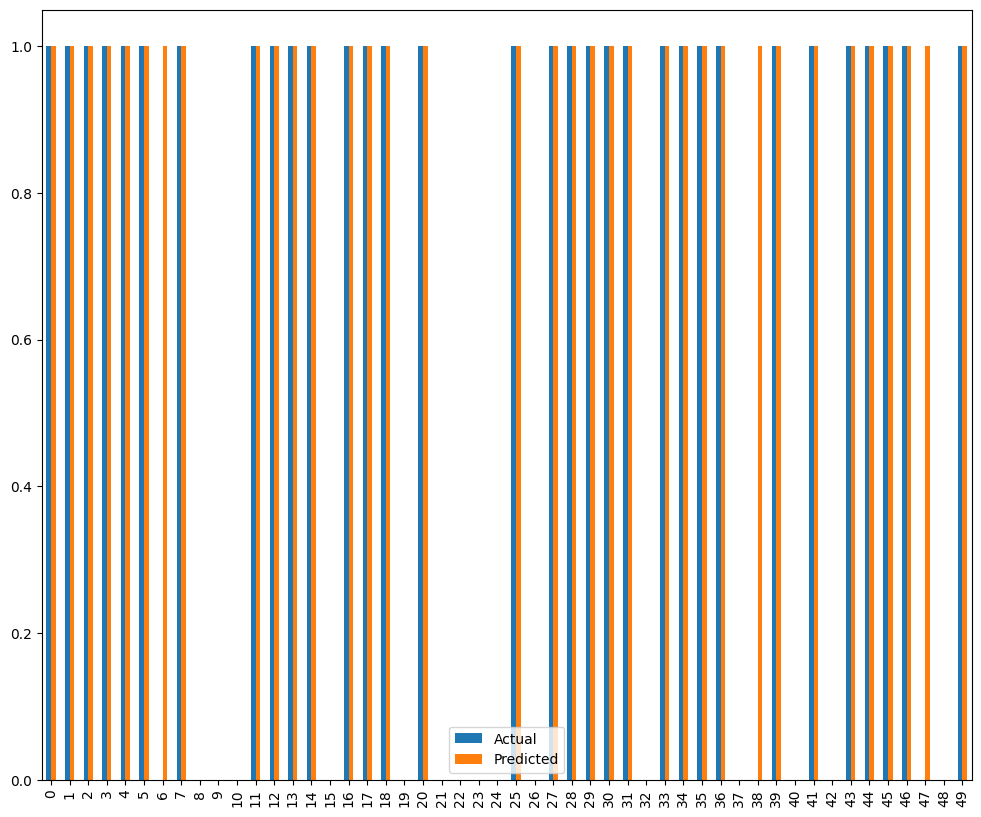

[0.94505495 0.93406593 0.97802198 0.96703297 0.97802198]
Accuracy: 0.9473684210526315


In [88]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

df1 = df.head(50)
df1.plot(kind='bar', figsize=(12,10))
plt.show()

scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
print(scores)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

## Choosing best K hyperparamter using Elbow Method

Using the Elbow Method to find the best K

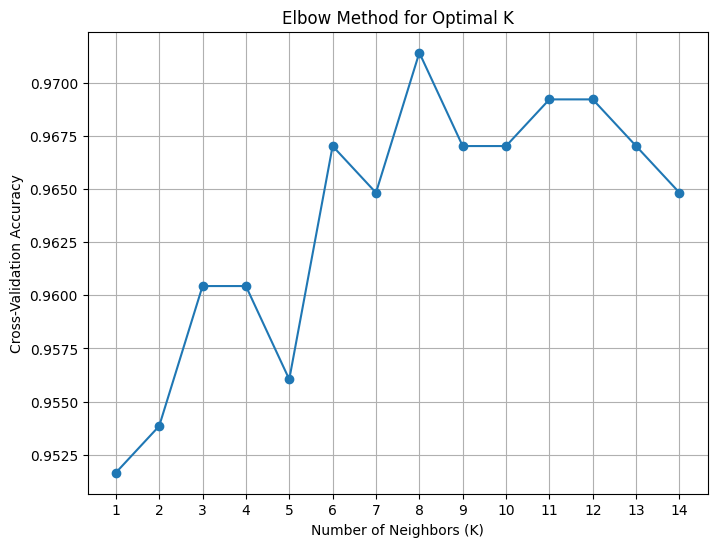

In [89]:
ks = list(range(1,15))
cv_scores = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
    cv_scores.append(np.mean(scores)) # Store the avg score for this values of K
    
# Plottnig to identify the "elbow"
plt.figure(figsize=(8, 6))
plt.plot(ks, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Elbow Method for Optimal K')
plt.xticks(ks)
plt.grid(True)
plt.show()

Thus we conclude that the K that gives us the best accuracy is K=8

     Actual  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
109       1          1
110       0          0
111       1          1
112       0          0
113       0          0

[114 rows x 2 columns]


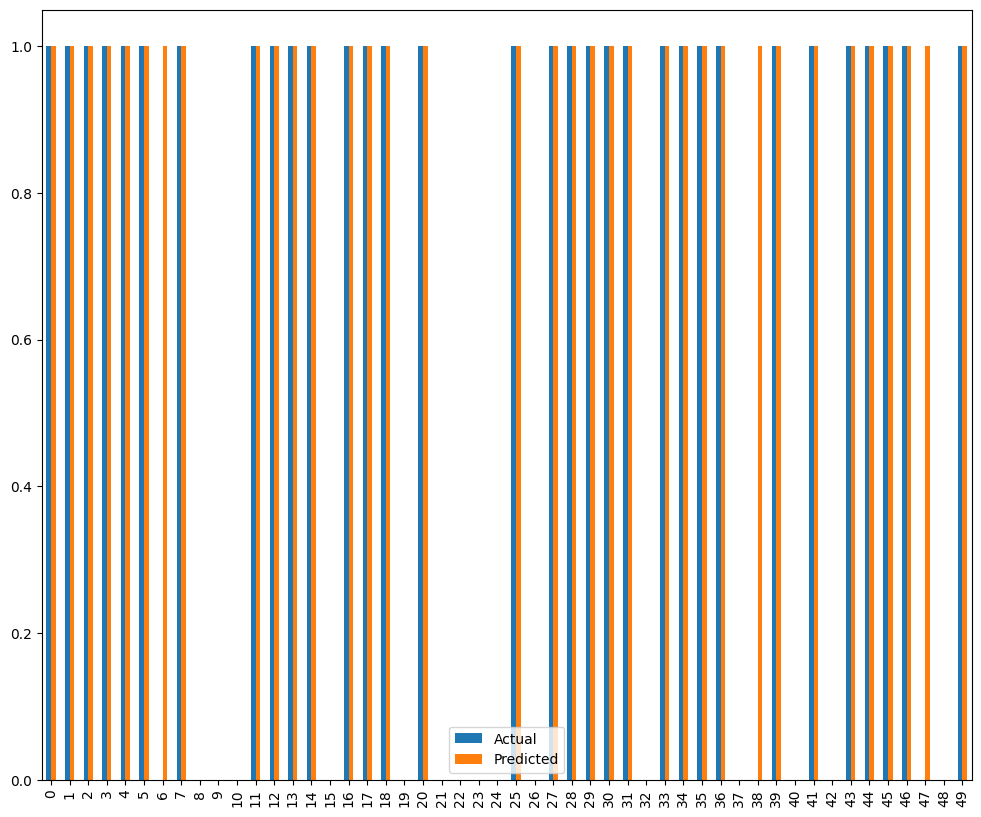

[0.96703297 0.96703297 0.97802198 0.96703297 0.97802198]
Accuracy: 0.9385964912280702


In [90]:
k = 8
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

df1 = df.head(50)
df1.plot(kind='bar', figsize=(12,10))
plt.show()

scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
print(scores)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

## Choosing best K hyperparamter using root n Method

In [91]:
# Calculate K using the sqrt(N) rule
N = len(X_train)  # number of training samples
K_sqrt = int(np.sqrt(N))
k = K_sqrt
print(f"Estimated K using sqrt(N): {K_sqrt}")

Estimated K using sqrt(N): 21


     Actual  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
109       1          1
110       0          0
111       1          1
112       0          1
113       0          0

[114 rows x 2 columns]


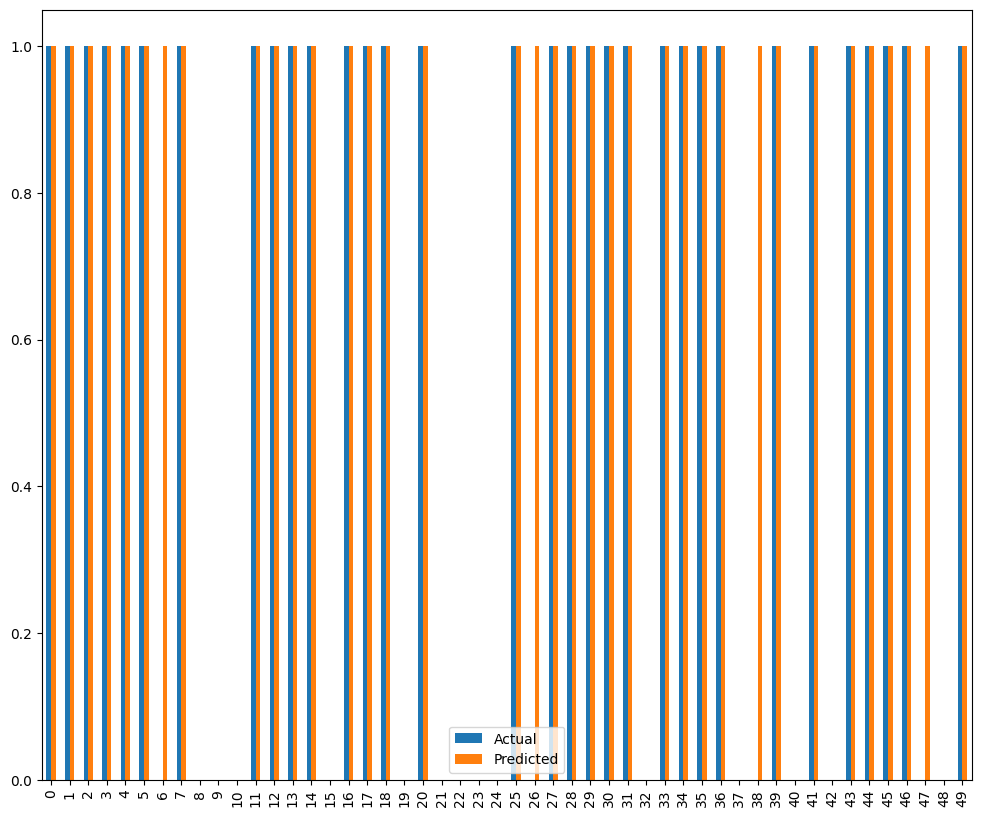

[0.93406593 0.96703297 0.97802198 0.97802198 0.95604396]
Accuracy: 0.9122807017543859


In [92]:

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

df1 = df.head(50)
df1.plot(kind='bar', figsize=(12,10))
plt.show()

scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
print(scores)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")